In [2]:
#Importing Packages
import numpy as np
import pandas as pd
import os
import pickle
import time
import matplotlib.cm
import matplotlib.pyplot as plt

In [3]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib import style

from sklearn.cluster import AgglomerativeClustering

In [4]:
data_path = os.path.join(os.getcwd(),'0. Data\\')

In [7]:
# Calculating percentage difference
dist_median_smth = pd.read_pickle(os.path.join(os.getcwd(),'0. Data/dist_median_smth.pkl'))
pc_dist = dist_median_smth.pct_change().dropna(axis=0)
pc_dist.head()

Postcode_District,AL1,AL10,AL2,AL3,AL4,AL5,AL6,AL7,AL8,AL9,...,YO32,YO41,YO42,YO43,YO51,YO60,YO61,YO62,YO7,YO8
Sale_quarter,,,,,,,,,,,,,,,,,,,,,
1995Q4,-0.003092,-0.023786,0.002392,0.014114,0.018963,0.008679,-0.024952,0.000839,0.026275,0.029159,...,-0.021682,0.001423,-0.008374,-0.000443,0.048481,0.037173,0.019654,0.027266,-0.006503,0.002753
1996Q1,0.010083,-0.004450,0.013994,0.016152,0.010222,0.013531,-0.023532,-0.007026,0.028138,0.022465,...,-0.017928,0.001265,-0.012170,-0.020034,-0.004514,0.052522,0.035206,0.007009,0.003167,-0.002528
1996Q2,0.016145,0.031813,0.039139,0.032746,0.014908,0.015838,0.034085,0.000784,0.026916,0.024680,...,0.006690,0.022267,0.001786,-0.015479,0.015894,0.061487,0.033820,-0.015098,-0.007381,0.003484
1996Q3,0.035865,0.041039,0.033835,0.034720,0.019437,0.019459,0.075379,0.011189,-0.002507,0.019562,...,0.027156,0.009285,-0.005640,0.013012,0.005280,0.027596,0.023616,-0.012807,0.008113,0.009075
1996Q4,0.047077,0.044529,0.012814,0.046044,0.013330,0.006251,0.074371,0.028957,-0.008320,0.000409,...,0.031025,0.003192,-0.000151,0.023297,-0.003009,0.001450,0.020496,0.005793,0.014647,0.025986


In [4]:
dist_median_smth = pd.read_pickle(os.path.join(os.getcwd(),'0. Data/dist_median_smth.pkl'))

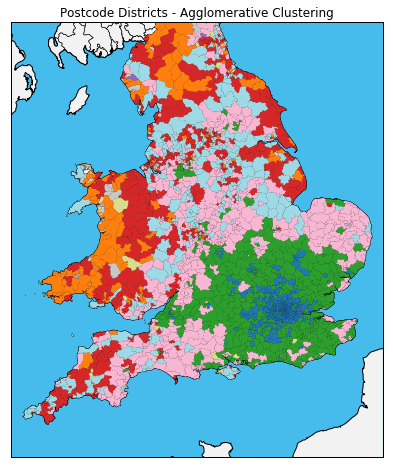

In [14]:
cluster = AgglomerativeClustering(n_clusters=10,linkage='ward')
cluster.fit(dist_median_smth.corr())
clusters = pd.DataFrame({'Postcode_District':dist_median_smth.columns,'Cluster':cluster.labels_})

#Plotting median price paid by postcode district
def plot_map(clusters, title):
    
    fig, ax = plt.subplots(figsize=(8,8))
    
    m = Basemap(resolution='h',projection='merc',
                lat_0=54.5,lon_0=-4.36,llcrnrlon=-6.0,
                llcrnrlat=49.5,urcrnrlon=2.,urcrnrlat=55.2)
    
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
    m.drawcoastlines()
    
    # Read in shapes and median price into a DataFrame
    m.readshapefile(os.path.join(os.getcwd(),"98. Basemap Resources/Districts"), name='Districts')
    Postcode_Districts = pd.DataFrame({'shapes':[Polygon(np.array(shape),True) for shape in m.Districts],
                                      'Postcode_District':[district['name'] for district in m.Districts_info]})
    Map_df = pd.merge(Postcode_Districts, clusters, how='inner', on='Postcode_District')
    
    # Creating colourmap dictionary
    cmap = plt.get_cmap('tab20')
    pc = PatchCollection(Map_df.shapes, zorder=2)
    norm = Normalize()

    pc.set_facecolor(cmap(norm(Map_df['Cluster'].fillna(0).values)))
    ax.add_collection(pc)
    
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes('right', size='5%', pad=0.05)
    #plt.colorbar(sm, cax=cax)
    ax.set_title(title)
    
    plt.savefig("Median_Clust_10.png",bbox_inches='tight',pad_inches=0)
    plt.show()
    
plot_map(clusters, title="Postcode Districts - Agglomerative Clustering")

Not Great!

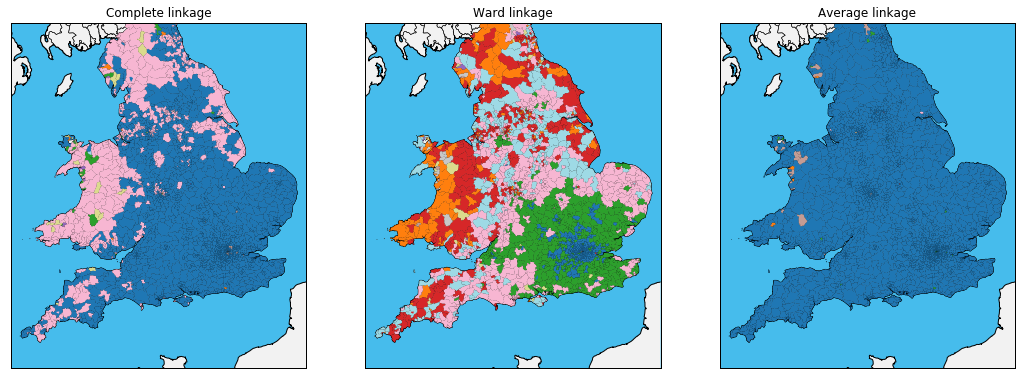

In [8]:
#f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
fig = plt.figure(figsize= [18,10])

########################################################################################
# plot 1 using complete linkage
########################################################################################
cluster = AgglomerativeClustering(n_clusters=10,linkage='complete')
cluster.fit(dist_median_smth.corr())
clusters = pd.DataFrame({'Postcode_District':dist_median_smth.columns,'Cluster':cluster.labels_})

ax = fig.add_subplot(131)

ax.set_title("Complete linkage")
m = Basemap(resolution='h',projection='merc',
            lat_0=54.5,lon_0=-4.36,llcrnrlon=-6.0,
            llcrnrlat=49.5,urcrnrlon=2.,urcrnrlat=55.2)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()

# Read in shapes and median price into a DataFrame
m.readshapefile(os.path.join(os.getcwd(),"98. Basemap Resources/Districts"), name='Districts')
Postcode_Districts = pd.DataFrame({'shapes':[Polygon(np.array(shape),True) for shape in m.Districts],
                                  'Postcode_District':[district['name'] for district in m.Districts_info]})
Map_df = pd.merge(Postcode_Districts, clusters, how='inner', on='Postcode_District')

# Creating colourmap dictionary
cmap = plt.get_cmap('tab20')
pc = PatchCollection(Map_df.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(Map_df['Cluster'].fillna(0).values)))
ax.add_collection(pc)


########################################################################################
# plot 2 using ward linkage
########################################################################################
cluster = AgglomerativeClustering(n_clusters=10,linkage='ward')
cluster.fit(dist_median_smth.corr())
clusters = pd.DataFrame({'Postcode_District':dist_median_smth.columns,'Cluster':cluster.labels_})

ax = fig.add_subplot(132)
ax.set_title("Ward linkage")
m = Basemap(resolution='h',projection='merc',
            lat_0=54.5,lon_0=-4.36,llcrnrlon=-6.0,
            llcrnrlat=49.5,urcrnrlon=2.,urcrnrlat=55.2)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()

# Read in shapes and median price into a DataFrame
m.readshapefile(os.path.join(os.getcwd(),"98. Basemap Resources/Districts"), name='Districts')
Postcode_Districts = pd.DataFrame({'shapes':[Polygon(np.array(shape),True) for shape in m.Districts],
                                  'Postcode_District':[district['name'] for district in m.Districts_info]})
Map_df = pd.merge(Postcode_Districts, clusters, how='inner', on='Postcode_District')

# Creating colourmap dictionary
cmap = plt.get_cmap('tab20')
pc = PatchCollection(Map_df.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(Map_df['Cluster'].fillna(0).values)))
ax.add_collection(pc)


########################################################################################
# plot 2 using average linkage
########################################################################################

cluster = AgglomerativeClustering(n_clusters=10,linkage='average')
#cluster = AgglomerativeClustering(n_clusters=10,linkage='complete')
cluster.fit(dist_median_smth.corr())
clusters = pd.DataFrame({'Postcode_District':dist_median_smth.columns,'Cluster':cluster.labels_})

ax = fig.add_subplot(133)
ax.set_title("Average linkage")
m = Basemap(resolution='h',projection='merc',
            lat_0=54.5,lon_0=-4.36,llcrnrlon=-6.0,
            llcrnrlat=49.5,urcrnrlon=2.,urcrnrlat=55.2)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()

# Read in shapes and median price into a DataFrame
m.readshapefile(os.path.join(os.getcwd(),"98. Basemap Resources/Districts"), name='Districts')
Postcode_Districts = pd.DataFrame({'shapes':[Polygon(np.array(shape),True) for shape in m.Districts],
                                  'Postcode_District':[district['name'] for district in m.Districts_info]})
Map_df = pd.merge(Postcode_Districts, clusters, how='inner', on='Postcode_District')

# Creating colourmap dictionary
cmap = plt.get_cmap('tab20')
pc = PatchCollection(Map_df.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(Map_df['Cluster'].fillna(0).values)))
ax.add_collection(pc)
plt.savefig("clustering_linkage_exmaple.png")
plt.show()

# Agglomerative Clustering with Connectivity Constraint

In [6]:
import shapefile
import itertools
from haversine import haversine

myshp = open(os.path.join(os.getcwd(),"98. Basemap Resources/Districts.shp"), "rb")
mydbf = open(os.path.join(os.getcwd(),"98. Basemap Resources/Districts.dbf"), "rb")
myshx= open(os.path.join(os.getcwd(),"98. Basemap Resources/Districts.shx"), "rb")
r = shapefile.Reader(shp=myshp, dbf=mydbf, shx=myshx)

In [7]:
# Getting postcode names
fields = r.records()
fields = [x[0] for x in fields]

# Getting shapes
shapes = r.shapes()

# Compiling into dictionary
data = {keys:values for (keys,values) in zip(fields,shapes)}

In [8]:
#%%timeit
def Dist_shp(shp1,shp2,sample_fac=20):
    ''' Takes every twentieth element and checks the distance between them'''
    return min([haversine(x[0][::-1],x[1][::-1]) for x in itertools.product(shp1.points[::sample_fac],shp2.points[::sample_fac])])

def adj_dict(code_lst,data,limit,sample_fac=20):
    ''' function to generate postcode adjacency dictionary. '''

    adj_matrix = np.empty([len(code_lst),len(code_lst)])
    i=0
    j=0

    length = len(list(itertools.product(code_lst,code_lst)))
    
    t0 = time.time()

    for n,x in enumerate(itertools.product(code_lst,code_lst)):
        
        if (n%100)==0:
            print("Percent:{:0.3%}, Time taken:{}".format(n/length,
                                                          time.strftime('%H:%M:%S', time.gmtime(time.time()-t0))),end="\r", flush=True)
            
        if j>=len(code_lst):
            j=0
            i+=1
            
        if Dist_shp(data[x[0]],data[x[1]],sample_fac=sample_fac)<=limit:
            adj_matrix[i,j] = 1 
        else:
            adj_matrix[i,j] = 0

        
        j+=1

    return adj_matrix

In [12]:
#Limit has been set to 3 and 4 seems to be the best values for the distance limit to be considered connected
t0 = time.time()
D_lst = list(pc_dist.columns)
adj_matrix = adj_dict(D_lst,data,1,sample_fac=5)
adj_df = pd.DataFrame(adj_matrix,columns=D_lst, index=D_lst)
adj_df.to_pickle(os.path.join(os.getcwd(),'0. Data/adjacency_matrix_1km.pkl'))

In [9]:
#adj_df.to_pickle(os.path.join(os.getcwd(),'0. Data/adjacency_matrix.pkl'))
adj_df = pd.read_pickle(os.path.join(os.getcwd(),'0. Data/adjacency_matrix_1km.pkl'))
a = adj_df.sum()
b = adj_df.count().sum()
#adj_df.to_pickle(os.path.join(os.getcwd(),'0. Data/adjacency_matrix.pkl'))
a[a==1]
#print("Connectivity factor:{:0.2%}".format(a/b))

Series([], dtype: float64)

In [7]:
cluster = AgglomerativeClustering(n_clusters=5,linkage='ward', connectivity=adj_df.values)
cluster.fit(pc_dist.corr())
clusters = pd.DataFrame({'Postcode_District':pc_dist.columns,'Cluster':cluster.labels_})

NameError: name 'pc_dist' is not defined

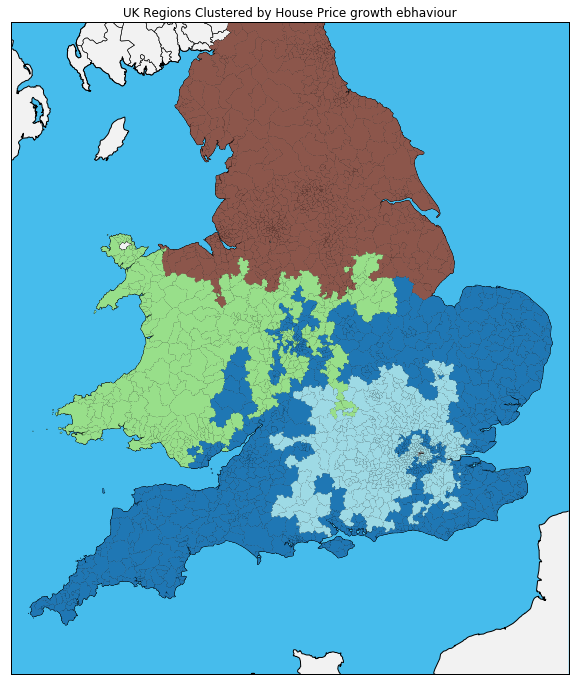

In [9]:
#Plotting median price paid by postcode district
def plot_map(clusters, title):
    
    fig, ax = plt.subplots(figsize=(10,20))

    m = Basemap(resolution='h',projection='merc',
                lat_0=54.5,lon_0=-4.36,
                llcrnrlat=49.5,llcrnrlon=-6.0,
                urcrnrlat=55.2,urcrnrlon=2.)

    
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
    m.drawcoastlines()
    
    # Read in shapes and median price into a DataFrame
    m.readshapefile(os.path.join(os.getcwd(),"98. Basemap Resources/Districts"), name='Districts')
    Postcode_Districts = pd.DataFrame({'shapes':[Polygon(np.array(shape),True) for shape in m.Districts],
                                      'Postcode_District':[district['name'] for district in m.Districts_info]})
    Map_df = pd.merge(Postcode_Districts, clusters, how='inner', on='Postcode_District')
    
    # Creating colourmap dictionary
    cmap = plt.get_cmap('tab20')
    pc = PatchCollection(Map_df.shapes, zorder=2)
    norm = Normalize()
    
    pc.set_facecolor(cmap(norm(Map_df['Cluster'].fillna(0).values)))
    ax.add_collection(pc)
    
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes('right', size='5%', pad=0.05)
    #plt.colorbar(sm, cax=cax)
    ax.set_title(title)
    
    plt.show()

plot_map(clusters, title="UK Regions Clustered by House Price growth ebhaviour")

In [7]:
#reloading data produced in House_price_index/ipynb
df = pd.read_pickle(os.path.join(os.getcwd(),'0. Data/Source_0.pkl'))
df.shape

(22875311, 15)

In [8]:
df2 = df[(df.Sale_quarter>=pd.Period("2010-01",freq="Q")) & (df.Sale_quarter<=pd.Period("2010-01",freq="Q"))]
df2.head()

,price,Property,Age,Duration,Sale_quarter,Postcode,Postcode_Dstr,Postcode_Area,Address,Easting,Northing,Output Area Classification Name,Region Name,Longitude,Latitude
1864128,200000,Semi_Detached,Old,Freehold,2010Q1,GL545UU,GL54,GL,(BOUNDY)PICCADILLYGL545UU,409268,224804,Rural residents,South West,-1.866644,51.921683
6202901,462000,Flat,Old,Leasehold,2010Q1,SW111HH,SW11,SW,.43FLATBBATTERSEARISESW111HH,527574,175122,Cosmopolitans,London,-0.165049,51.460705
13541945,437500,Flat,Old,Leasehold,2010Q1,EC1R5BD,EC1R,EC,1-10FLAT9SUMMERSSTREETEC1R5BD,531229,182095,Cosmopolitans,London,-0.109878,51.522534
22321478,245000,Flat,Old,Leasehold,2010Q1,HA04AY,HA0,HA,1-2CORONETPARADEHA04AY,518125,184805,Multicultural metropolitans,London,-0.297754,51.549780
11393830,212000,Semi_Detached,Old,Freehold,2010Q1,CV377SS,CV37,CV,1-2HOCKLEYLANECV377SS,427209,248909,Rural residents,West Midlands,-1.603864,52.137813


In [9]:
df2.loc[:,'log_price'] = np.log(df2['price'])
df3 = df2.drop(['price','Postcode','Postcode_Area','Address','Easting','Northing','Longitude','Latitude'], axis=1)
df3.head()

c:\python36\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\python36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Property,Age,Duration,Sale_quarter,Postcode_Dstr,Output Area Classification Name,Region Name,log_price
1864128,Semi_Detached,Old,Freehold,2010Q1,GL54,Rural residents,South West,12.206073
6202901,Flat,Old,Leasehold,2010Q1,SW11,Cosmopolitans,London,13.043320
13541945,Flat,Old,Leasehold,2010Q1,EC1R,Cosmopolitans,London,12.988832
22321478,Flat,Old,Leasehold,2010Q1,HA0,Multicultural metropolitans,London,12.409013
11393830,Semi_Detached,Old,Freehold,2010Q1,CV37,Rural residents,West Midlands,12.264342


In [10]:
#df3.to_pickle(os.path.join(os.getcwd(),'0. Data/df3.pkl'))
df3 = pd.read_pickle(os.path.join(os.getcwd(),'0. Data/df3.pkl'))

In [11]:
# Finding optimal clustering using elbow method
from sklearn.linear_model import Ridge
model = Ridge()

# Getting halifax clusters accuracy
halifax_clust = pd.get_dummies(df3,columns=['Property',
                                            'Age','Duration',
                                            'Output Area Classification Name','Region Name'])
X_ = halifax_clust.drop(['log_price','Postcode_Dstr','Sale_quarter'], axis=1)
y_ = halifax_clust[['log_price']]
model.fit(X_,y_)
h_score = model.score(X_,y_)
h_score = [h_score]*39


In [16]:
score = []
for i in range(1,40):
    cluster = AgglomerativeClustering(n_clusters=i,linkage='ward', connectivity=adj_df.values)
    cluster.fit(pc_dist.corr())
    clusters = pd.DataFrame({'Postcode_Dstr':pc_dist.columns,'Cluster':cluster.labels_})
    
    df_clust = df3.merge(clusters,on=['Postcode_Dstr'],how='inner').drop('Postcode_Dstr',axis=1)
    df_clust = pd.get_dummies(df_clust, columns=['Property',
                                            'Age','Duration',
                                            'Output Area Classification Name','Cluster'], prefix='dum')
    
    X_ = df_clust.drop(['log_price','Sale_quarter','Region Name'], axis=1)
    y_ = df_clust[['log_price']]
    
    model.fit(X_.values,y_.values)
    
    score.append(model.score(X_.values,y_.values))
    
fig, ax = plt.subplots()
ax.plot(list(range(1,40)),score)
ax.plot(list(range(1,40)),h_score)
ax.set_xlabel("No. Clusters")
ax.set_ylabel("R-squared")
ax.set_title("Agglomerative Clust vs Regional Gov Clust")
plt.grid()
plt.legend(labels = ['Clustered','Halifax'])
plt.show()

NameError: name 'pc_dist' is not defined

# price distance matrix with agg clustering and connectivity constraint

In [5]:
#dist_median_smth.to_pickle(os.path.join(os.getcwd(),'0. Data/dist_median_smth.pkl'))
dist_median_smth = pd.read_pickle(os.path.join(os.getcwd(),'0. Data/dist_median_smth.pkl'))

In [6]:
dist_median_smth.head()

Postcode_District,AL1,AL10,AL2,AL3,AL4,AL5,AL6,AL7,AL8,AL9,...,YO32,YO41,YO42,YO43,YO51,YO60,YO61,YO62,YO7,YO8
Sale_quarter,,,,,,,,,,,,,,,,,,,,,
1995Q3,78990.770886,60328.125920,81569.085940,87037.697578,85609.215478,93110.378810,104746.282540,66991.011736,87647.720927,84688.233165,...,68359.005336,71068.107590,66167.375198,60015.535548,66785.738095,71910.606431,76158.054127,73856.647667,68311.815107,55598.824789
1995Q4,78746.510994,58893.131267,81764.184974,88266.129078,87232.647130,93918.480378,102132.697474,67047.211890,89950.679633,87157.650673,...,66876.868327,71169.232529,65613.287875,59988.975144,70023.565146,74583.715914,77654.861465,75870.414957,67867.556984,55751.868877
1996Q1,79540.514848,58631.065120,82908.384155,89691.837363,88124.380738,95189.292884,99729.313874,66576.107851,92481.716847,89115.624111,...,65677.881476,71259.268340,64814.788383,58787.159877,69707.481725,78501.005291,80388.756374,76402.187314,68082.513712,55610.906643
1996Q2,80824.735058,60496.280237,86153.317149,92628.889035,89438.098097,96696.887168,103128.555122,66628.321299,94970.991167,91315.013578,...,66117.294090,72845.988542,64930.579918,57877.183513,70815.382432,83327.807172,83107.527826,75248.672318,67580.029524,55804.650480
1996Q3,83723.535018,62978.989573,89068.344580,95844.990950,91176.538533,98578.532070,110902.273881,67373.806865,94732.871360,93101.356748,...,67912.754144,73522.350991,64564.369834,58630.292488,71189.313694,85627.307466,85070.170008,74284.998787,68128.300660,56311.053188


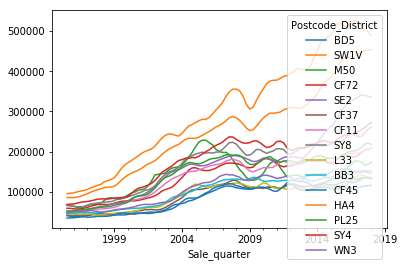

In [14]:
dist_median_smth.sample(15, axis=1).plot()

c:\python36\lib\site-packages\sklearn\cluster\hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


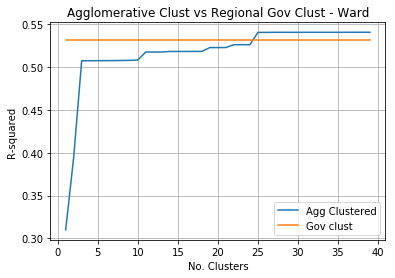

In [15]:
score=[]
for i in range(1,40):
    cluster = AgglomerativeClustering(n_clusters=i,linkage='ward', connectivity=adj_df.values)
    cluster.fit(dist_median_smth.corr())
    clusters = pd.DataFrame({'Postcode_Dstr':dist_median_smth.columns,'Cluster':cluster.labels_})
    
    df_clust = df3.merge(clusters,on=['Postcode_Dstr'],how='inner').drop('Postcode_Dstr',axis=1)
    df_clust = pd.get_dummies(df_clust, columns=['Property',
                                            'Age','Duration',
                                            'Output Area Classification Name','Cluster'], prefix='dum')
    
    X_ = df_clust.drop(['log_price','Sale_quarter','Region Name'], axis=1)
    y_ = df_clust[['log_price']]
    
    model.fit(X_.values,y_.values)
    
    score.append(model.score(X_.values,y_.values))
    
fig, ax = plt.subplots()
ax.plot(list(range(1,40)),score)
ax.plot(list(range(1,40)),h_score)
ax.set_xlabel("No. Clusters")
ax.set_ylabel("R-squared")
ax.set_title("Agglomerative Clust vs Regional Gov Clust - Ward")
plt.grid()
plt.legend(labels = ['Agg Clustered','Gov clust'])
plt.savefig("Hedonic Regress vs no clust.png",bbox_inches='tight',pad_inches=0)
plt.show()

In [23]:
cluster = AgglomerativeClustering(n_clusters=10,linkage='ward', connectivity=adj_df.values)
cluster.fit(dist_median_smth.corr())
clusters = pd.DataFrame({'Postcode_District':dist_median_smth.columns,'Cluster':cluster.labels_})

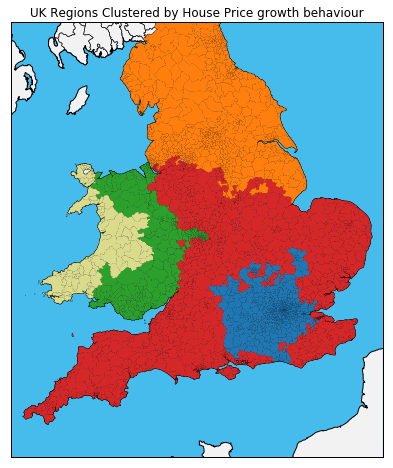

In [28]:
#Plotting median price paid by postcode district
def plot_map(clusters, title):
    
    fig, ax = plt.subplots(figsize=(8,8))
    
    m = Basemap(resolution='h',projection='merc',
                lat_0=54.5,lon_0=-4.36,
                llcrnrlat=49.5,llcrnrlon=-6.0,
                urcrnrlat=55.2,urcrnrlon=2.)
    
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
    m.drawcoastlines()
    
    # Read in shapes and median price into a DataFrame
    m.readshapefile(os.path.join(os.getcwd(),"98. Basemap Resources/Districts"), name='Districts')
    Postcode_Districts = pd.DataFrame({'shapes':[Polygon(np.array(shape),True) for shape in m.Districts],
                                      'Postcode_District':[district['name'] for district in m.Districts_info]})
    Map_df = pd.merge(Postcode_Districts, clusters, how='inner', on='Postcode_District')
    
    # Creating colourmap dictionary
    cmap = plt.get_cmap('tab20')
    pc = PatchCollection(Map_df.shapes, zorder=2)
    norm = Normalize()
    
    pc.set_facecolor(cmap(norm(Map_df['Cluster'].fillna(0).values)))
    ax.add_collection(pc)
    
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes('right', size='5%', pad=0.05)
    #plt.colorbar(sm, cax=cax)
    ax.set_title(title)
    
    plt.savefig("Agg_clust_10.png",bbox_inches='tight',pad_inches=0)
    
    plt.show()

plot_map(clusters, title="UK Regions Clustered by House Price growth behaviour")

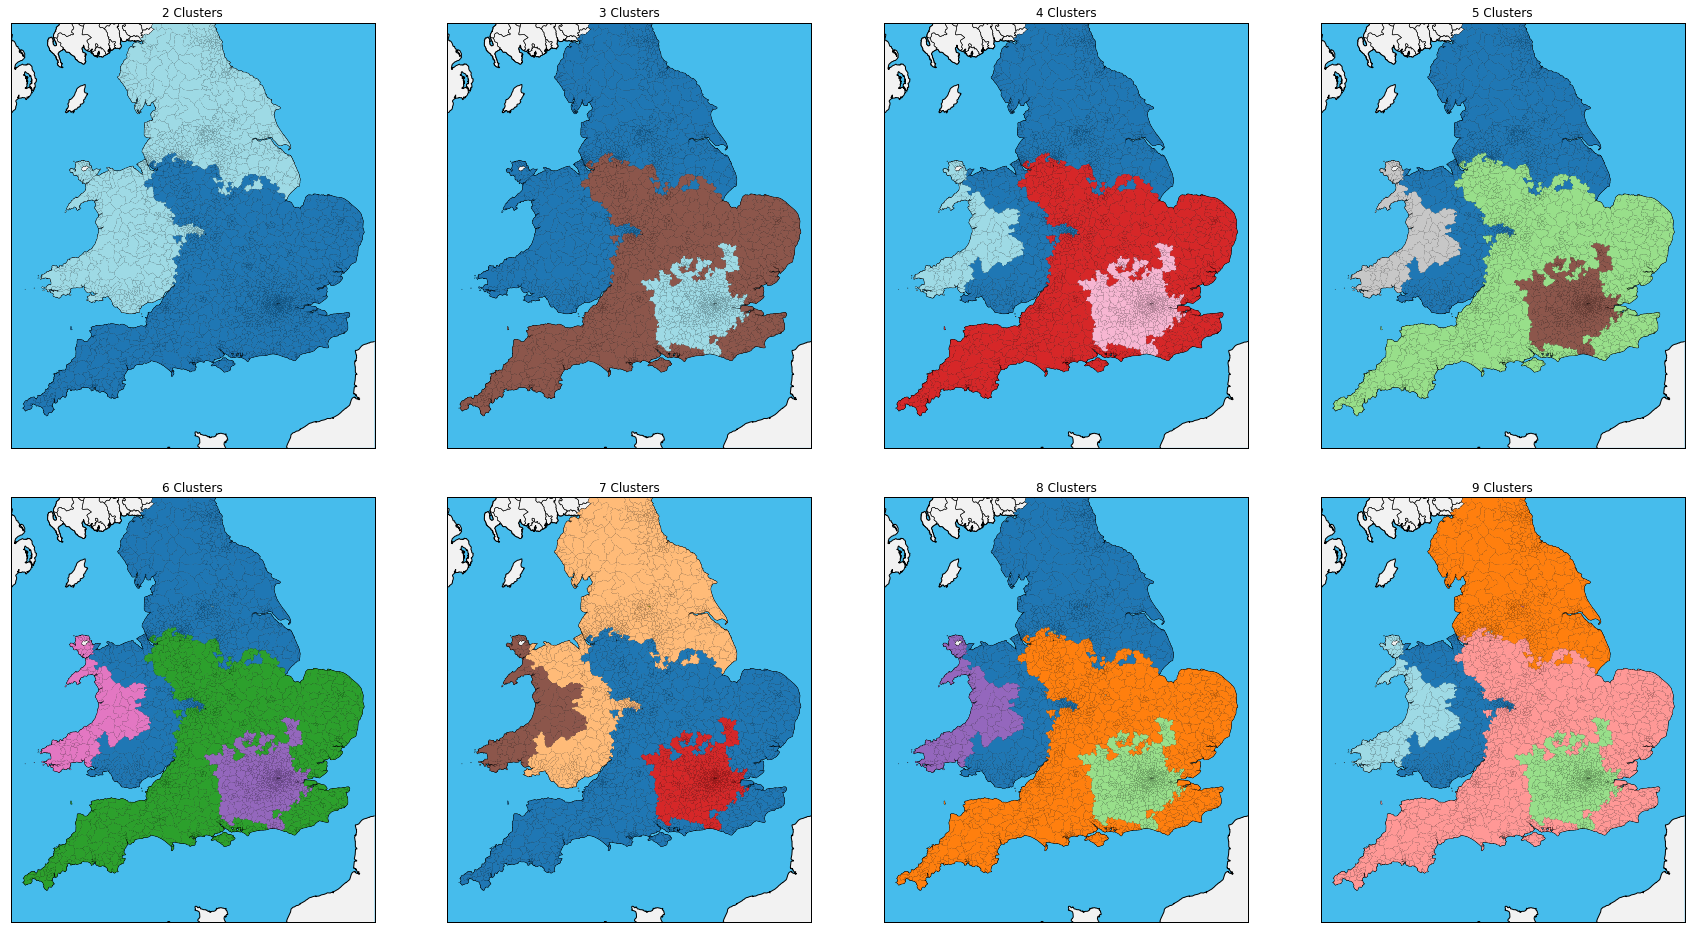

In [26]:
fig = plt.figure(figsize= [30,32])

row=2
col=1
for i in range(2,10):
    
    cluster = AgglomerativeClustering(n_clusters=i,linkage='ward', connectivity=adj_df.values)
    cluster.fit(dist_median_smth.corr())
    clusters = pd.DataFrame({'Postcode_District':dist_median_smth.columns,'Cluster':cluster.labels_})
   
    ax = fig.add_subplot(row,4,col)
    
    col+=1
    if col==5:
        col=1
        row-=1

    
    ax.set_title("{} Clusters".format(i))
    m = Basemap(resolution='h',projection='merc',
                lat_0=54.5,lon_0=-4.36,
                llcrnrlon=-6.0,llcrnrlat=49.5,
                urcrnrlon=2.,urcrnrlat=55.2)

    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
    m.drawcoastlines()

    # Read in shapes and median price into a DataFrame
    m.readshapefile(os.path.join(os.getcwd(),"98. Basemap Resources/Districts"), name='Districts')
    Postcode_Districts = pd.DataFrame({'shapes':[Polygon(np.array(shape),True) for shape in m.Districts],
                                       'Postcode_District':[district['name'] for district in m.Districts_info]})
    
    Map_df = pd.merge(Postcode_Districts, clusters, how='inner',
                      on='Postcode_District')

    # Creating colourmap dictionary
    cmap = plt.get_cmap('tab20')
    pc = PatchCollection(Map_df.shapes, zorder=2)
    norm = Normalize()

    pc.set_facecolor(cmap(norm(Map_df['Cluster'].fillna(0).values)))
    ax.add_collection(pc)
plt.savefig("geo_plots_noclust.png",bbox_inches='tight',pad_inches=0)
plt.show()

In [28]:
cluster = AgglomerativeClustering(n_clusters=25,linkage='ward', connectivity=adj_df.values)
cluster.fit(dist_median_smth.corr())
clusters = pd.DataFrame({'Postcode_District':dist_median_smth.columns,'Cluster':cluster.labels_})

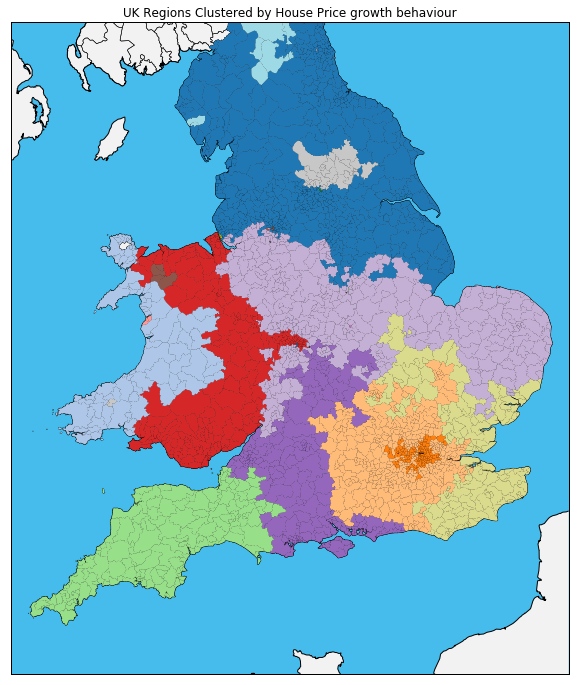

In [30]:
#Plotting median price paid by postcode district
def plot_map(clusters, title):
    
    fig, ax = plt.subplots(figsize=(10,20))

    m = Basemap(resolution='h',projection='merc',
                lat_0=54.5,lon_0=-4.36,
                llcrnrlat=49.5,llcrnrlon=-6.0,
                urcrnrlat=55.2,urcrnrlon=2.)

    
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
    m.drawcoastlines()
    
    # Read in shapes and median price into a DataFrame
    m.readshapefile(os.path.join(os.getcwd(),"98. Basemap Resources/Districts"), name='Districts')
    Postcode_Districts = pd.DataFrame({'shapes':[Polygon(np.array(shape),True) for shape in m.Districts],
                                      'Postcode_District':[district['name'] for district in m.Districts_info]})
    Map_df = pd.merge(Postcode_Districts, clusters, how='inner', on='Postcode_District')
    
    # Creating colourmap dictionary
    cmap = plt.get_cmap('tab20')
    pc = PatchCollection(Map_df.shapes, zorder=2)
    norm = Normalize()
    
    pc.set_facecolor(cmap(norm(Map_df['Cluster'].fillna(0).values)))
    ax.add_collection(pc)
    
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes('right', size='5%', pad=0.05)
    #plt.colorbar(sm, cax=cax)
    ax.set_title(title)
    
    plt.savefig("geo_plots_25clust.png",bbox_inches='tight',pad_inches=0)
    
    plt.show()

plot_map(clusters, title="UK Regions Clustered by House Price growth behaviour")

# Dynamic Time Warping distance measure

In [30]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from scipy.spatial import distance_matrix

In [ ]:
distance, path = fastdtw(x, y, dist=euclidean)

In [34]:
cols = list(dist_median_smth.columns)
len(cols)

2264

In [8]:
cols = list(dist_median_smth.columns)
len_c = len(cols)
dist_M = np.empty([len_c,len_c])
counter = 0

import time
t0 = time.time()
for i,col_x in enumerate(cols):
    for j,col_y in enumerate(cols):
        dist_M[i,j], _ = fastdtw(dist_median_smth[col_x], dist_median_smth[col_y], dist=euclidean) 
        counter+=1
        
        print("{}/{}, Perc Complete:{:0.3%}, Time Taken:{}".format(counter,len_c*len_c,counter/(len_c*len_c),
                                                                   time.strftime('%H:%M:%S', time.gmtime(time.time()-t0))),end="\r")

DTW_DM = pd.DataFrame(dist_M,columns=cols,index=cols)
DTW_DM.head()

'\ncols = list(dist_median_smth.columns)\nlen_c = len(cols)\ndist_M = np.empty([len_c,len_c])\ncounter = 0\n\nimport time\nt0 = time.time()\nfor i,col_x in enumerate(cols):\n    for j,col_y in enumerate(cols):\n        dist_M[i,j], _ = fastdtw(dist_median_smth[col_x], dist_median_smth[col_y], dist=euclidean) \n        counter+=1\n        \n        print("{}/{}, Perc Complete:{:0.3%}, Time Taken:{}".format(counter,len_c*len_c,counter/(len_c*len_c),\n                                                                   time.strftime(\'%H:%M:%S\', time.gmtime(time.time()-t0))),end="\r")\n\nDTW_DM = pd.DataFrame(dist_M,columns=cols,index=cols)\nDTW_DM.head()\n'

# Varying the distance metric

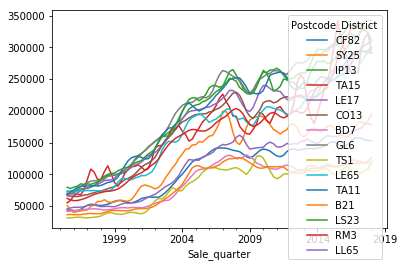

In [9]:
dist_median_smth.sample(15,axis=1).plot()

In [35]:
from sklearn.metrics import pairwise_distances
cols = list(dist_median_smth.columns)
d = len(cols)
DM = np.empty([d,d])

In [42]:
no_e = DM.shape[0]*DM.shape[1]
count=0
t0 = time.time()
for i,x in enumerate(cols):
    for j,y in enumerate(cols):
        DM[i,j] = pairwise_distances(np.array([dist_median_smth[x].values]), 
                               np.array([dist_median_smth[y].values]),metric="cosine").mean()
        count+=1
        
        if (count%10000==0):
            print("Percent Complete:{:0.3%}".format(count/no_e),end="\r", flush=True)

In [45]:
DM_cosine = pd.DataFrame(DM,columns=cols, index=cols)
DM_cosine.head()

,AL1,AL10,AL2,AL3,AL4,AL5,AL6,AL7,AL8,AL9,...,YO32,YO41,YO42,YO43,YO51,YO60,YO61,YO62,YO7,YO8
AL1,0.000000,0.001955,4.777109e-04,0.000951,0.000736,0.000912,0.001517,0.001030,0.001059,0.000859,...,0.003255,0.003794,0.005161,0.009030,0.003714,0.005537,0.004505,0.006548,0.007049,0.008341
AL10,0.001955,0.000000,2.789497e-03,0.003958,0.003456,0.003386,0.004525,0.001483,0.003553,0.003490,...,0.002771,0.003255,0.003533,0.006958,0.003365,0.004536,0.004241,0.006444,0.005622,0.005591
AL2,0.000478,0.002789,1.110223e-16,0.001143,0.000784,0.000797,0.001718,0.001466,0.001227,0.001248,...,0.003358,0.004832,0.005922,0.009466,0.003540,0.006323,0.004998,0.006576,0.007375,0.008592
AL3,0.000951,0.003958,1.143020e-03,0.000000,0.000649,0.000864,0.000938,0.003102,0.000745,0.000576,...,0.002880,0.003600,0.004913,0.007815,0.003584,0.004941,0.003405,0.005162,0.005789,0.007814
AL4,0.000736,0.003456,7.842353e-04,0.000649,0.000000,0.000353,0.000860,0.002414,0.000826,0.000575,...,0.003203,0.004116,0.005500,0.008626,0.003475,0.004929,0.004093,0.005511,0.006408,0.008209
